In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions.functions import EmissionProfile, AbsoluteMetricsPulseDefaultCO2, AbsoluteMetrics, RelativeMetrics
from climate_models.fair import BackgroundSpeciesQuantities, FaIRClimateModel, GWPStarEquivalentEmissionsFunction

In [2]:
# emissions_erf = EmissionProfile(1765,2020,2200, 'pulse', 1e10)
# a = GWPStarEquivalentEmissionsFunction(1765, 2200, emissions_erf, 20, 0.25)
# a

## Parameters

In [3]:
studied_species = "Aviation NOx"
co2_method = 'IPCC'
start_year = 1765
t0 = 2020
time_horizon = 100
end_year = t0 + time_horizon
unit_value = 1e15 # [kg] or [km] for contrails

# Default values recommended for unit value
## CO2: 1e10 kg, i.e. 10 Mt
## Contrails: 1 km
## NOx:
## H2O: 1e10 kg, i.e. 10 Mt
## Soot:
## Sulfur:

In [4]:
if studied_species == "Aviation CO2":
    sensitivity_erf = 0 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation contrails":
    sensitivity_erf = 9.36e-13
    ratio_erf_rf = 0.42
elif studied_species == "Aviation NOx":
    sensitivity_erf = [34.4e-12 / (14/46), -9.3e-12 / (14/46), -18.7e-12 / (14/46), -2.8e-12 / (14/46)]
    ratio_erf_rf = [1.37, 1.18, 1.18, 1.18]
elif studied_species == "Aviation NOx ST O3 increase":
    sensitivity_erf = 34.4e-12 / (14/46)
    ratio_erf_rf = 1.37
elif studied_species == "Aviation NOx LT O3 decrease":
    sensitivity_erf = -9.3e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx CH4 decrease":
    sensitivity_erf = -18.7e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation NOx SWV decrease":
    sensitivity_erf = -2.8e-12 / (14/46)
    ratio_erf_rf = 1.18
elif studied_species == "Aviation H2O":
    sensitivity_erf = 0.0052e-12
    ratio_erf_rf = 1
elif studied_species == "Aviation soot":
    sensitivity_erf = 100.7e-12 # Not used
    ratio_erf_rf = 1
elif studied_species == "Aviation sulfur":
    sensitivity_erf = -19.9e-12 # Not used
    ratio_erf_rf = 1

## Metrics calculation

In [5]:
background_species_quantities = BackgroundSpeciesQuantities(start_year, end_year, rcp='RCP45')
emission_profile = EmissionProfile(start_year,t0,time_horizon, 'pulse', unit_value)

In [6]:
radiative_forcing, effective_radiative_forcing, temperature = FaIRClimateModel(start_year, end_year, background_species_quantities, emission_profile, studied_species, sensitivity_erf, ratio_erf_rf)

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

C:\ProgramData\Miniconda3\envs\AeroMetrics\lib\site-packages\fair\forcing\ghg.py:454: RuntimeWarning: invalid value encountered in log
  f1_co2 * np.log(co2 / co2_base) + f3_co2 * (np.sqrt(co2) - np.sqrt(co2_base))
C:\ProgramData\Miniconda3\envs\AeroMetrics\lib\site-packages\fair\forcing\ghg.py:454: RuntimeWarning: invalid value encountered in sqrt
  f1_co2 * np.log(co2 / co2_base) + f3_co2 * (np.sqrt(co2) - np.sqrt(co2_base))
C:\ProgramData\Miniconda3\envs\AeroMetrics\lib\site-packages\fair\gas_cycle\forward.py:74: RuntimeWarning: divide by zero encountered in divide
  decay_rate = timestep / (alpha_lifetime * lifetime)
C:\ProgramData\Miniconda3\envs\AeroMetrics\lib\site-packages\fair\forcing\ghg.py:454: RuntimeWarning: invalid value encountered in log
  f1_co2 * np.log(co2 / co2_base) + f3_co2 * (np.sqrt(co2) - np.sqrt(co2_base))
C:\ProgramData\Miniconda3\envs\AeroMetrics\lib\site-packages\fair\forcing\ghg.py:454: RuntimeWarning: invalid value encountered in sqrt
  f1_co2 * np.log(co

Running 1 projections in parallel:   0%|          | 0/355 [00:00<?, ?timesteps/s]

In [7]:
if co2_method == 'IPCC':
    radiative_forcing_co2, agwp_co2, aegwp_co2, temperature_co2, agtp_co2, igtp_co2, atr_co2 = AbsoluteMetricsPulseDefaultCO2(time_horizon, unit_value)
elif co2_method == 'FaIR':
    radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2 = FaIRClimateModel(start_year, end_year, background_species_quantities, emission_profile, "Aviation CO2", sensitivity_erf, ratio_erf_rf)
    agwp_co2, aegwp_co2, agtp_co2, igtp_co2, atr_co2 = AbsoluteMetrics(radiative_forcing_co2, effective_radiative_forcing_co2, temperature_co2, time_horizon)
agwp, aegwp, agtp, igtp, atr = AbsoluteMetrics(radiative_forcing, effective_radiative_forcing, temperature, time_horizon)
gwp, egwp, gtp, igtp, ratr = RelativeMetrics(agwp_co2, aegwp_co2, agtp_co2, igtp_co2, atr_co2, agwp, aegwp, agtp, igtp, atr)

In [8]:
index_noms = ["GWP", "E-GWP", "GTP", "iGTP", "r-ATR"]
df = pd.DataFrame([gwp, egwp, gtp, igtp, ratr], columns=["Value"], index=index_noms)
df

,Value
GWP,1.240232e+16
E-GWP,3.790093e+15
GTP,-5.083194e+14
iGTP,4.111316e+15
r-ATR,4.111316e+15


## Analysis (for CO2)

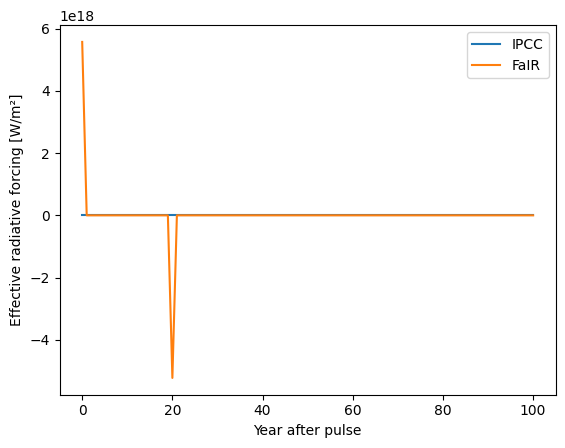

In [9]:
plt.plot(radiative_forcing_co2, label='IPCC')
plt.plot(effective_radiative_forcing[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Effective radiative forcing [W/m²]')
plt.legend()

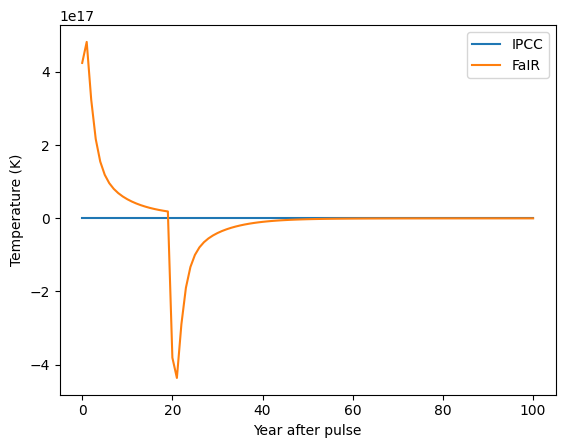

In [10]:
plt.plot(temperature_co2, label='IPCC')
plt.plot(temperature[t0-start_year:end_year], label='FaIR')
plt.xlabel('Year after pulse')
plt.ylabel('Temperature (K)')
plt.legend()